In [ ]:
'''
Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information
on the Titanic passengers and can be used to predict whether a passenger survived or not.

Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.
'''

#### Loading of Python & Sklearn modules for Data and Statisticsl analysis

In [1]:
# matplotlib inline : to reflect plots and graphics on jupyter notbooks itself
%matplotlib inline
# for Data analysis using pandas
import pandas as pd
# for numerical opeartions using numpy
import numpy as np
# for graphical representation of data using matplotlib
import matplotlib.pyplot as plt
# for graphical representation of data using Seaborn
import seaborn as sb
# to disaply decision tree
from IPython.display import Image, display
# to display Decision tree into image
import pydotplus as pydotplus

In [2]:
# Python modules for Machine learning algorithms and statistical ananlysis
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.metrics import accuracy_score,classification_report

### Data Pre-processing

#### Load Titanic Dataset

In [5]:
# Load Dataset and Convert it into Datafarme
titanic=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description of Titanic Dataset :

    . Survival Survival 0 = No, 1 = Yes
    . Pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    . sex : Gender of passangers
    . Age : Age of passangers( Age in years)
    . SibSp # of siblings / spouses aboard the Titanic
    . Parch # of parents / children aboard the Titanic
    . Ticket : Ticket number
    . fare : Passenger fare
    . cabin : Cabin number
    . embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Data Exploration

#### Structure of data

In [6]:
print("The No. of rows in titanic data : {0}\nThe No. of columns in titanic data : {1}".format(str(titanic.shape[0]),
str(titanic.shape[1])))

The No. of rows in titanic data : 891
The No. of columns in titanic data : 12


#### Check for datatypes and presence of null values

In [7]:
print("The Features(columns) of titanic data \n")
titanic.info()

The Features(columns) of titanic data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
# Calculation Null/NA values present in titanic dataset
print("The NULL/NA Values in titanic dataset feature-wise ")
titanic.isna().sum()

The NULL/NA Values in titanic dataset feature-wise 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Statictical observation
# descirbe method() for statistical analysis for numerical data-type features
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Analyze the data
titanic.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [11]:
# Sex wise Survived
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sibling wise Suvived
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Parch wise Suvived
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
# Fare wise Suvived
(titanic[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)).head()

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0


In [17]:
# Fill NA/NULL values with Mean for numerical datatatype features
titanic=titanic.fillna(titanic.mean())
# Re-evaluate for NA values for "Age" Feature , as if "Cabin" & "Embarked" are object type data
print("The NA/NULL values in 'Age' Feature:", titanic['Age'].isna().sum())

The NA/NULL values in 'Age' Feature: 0


In [18]:
# Statistical observation for Passengers survival based on dataset
titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Based upon observation ,There's 61.6% people who had not survived & 38.8% people had survived.

### Data Visualisation

#### Visual Descripitaion of individual features

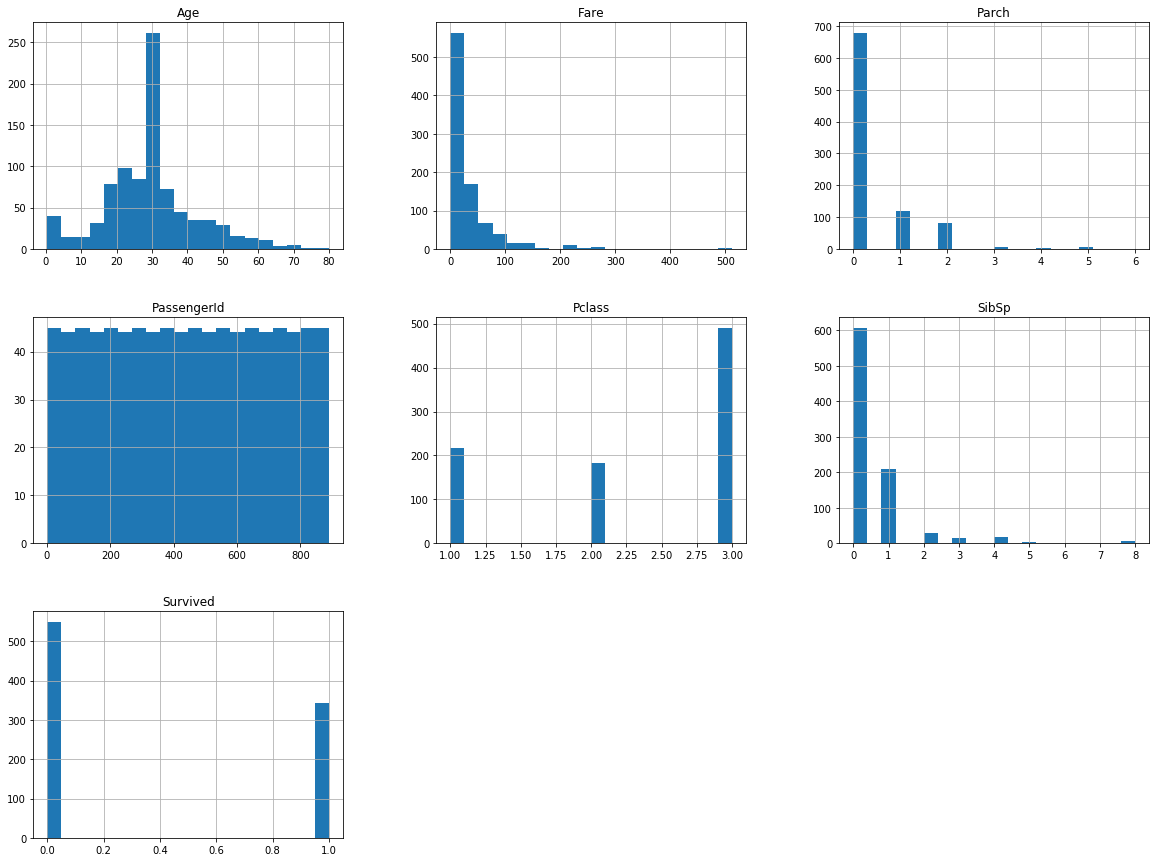

In [19]:
titanic.hist(bins=20, figsize=(20,15))
plt.show()

### Data Preparation

##### Note : As stated in problem , Survavival ananlysis for passengers need to be done based upon features like Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard) ,and Fare , hence form a dataframe having these features from titainc dataset.

In [20]:
# Create dataframe with selective features
titanic_data = titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [21]:
# Transforming Text values of "Sex" feature into Numerical values
# pandas.factorize() to convert Categorical object into numerical values
# replacing 'male' with Zero and 'female' with 1
titanic_data.loc[titanic_data.Sex.isin(values=['male','female']),'Sex'],_=pd.factorize(titanic_data['Sex'])

C:\Users\Avengers\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Now Data is in numerical form , Let's split the data into Target and feature variable

In [23]:
# Selection of target and features into variable
target=titanic_data[['Survived']]
features=titanic_data.iloc[:,1:]

In [24]:
print("Target variable ")
target.head()

Target variable 


,Survived
0,0
1,1
2,1
3,1
4,0


In [25]:
print("Features variable ")
features.head()

Features variable 


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


### Split the Target and Feature variable into Train and Test dataset

In [27]:
# python module for split data into train and test
from sklearn.model_selection import train_test_split

In [28]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30 , shuffle=True)

print("The Size of Fetures data(X) for Training set" , X_train.shape)
print("The Size of Fetures data(X) for Test set" , X_test.shape)
print("The Size of Target data(y) for Training set" , y_train.shape)
print("The Size of Target data(y) for Test set" , y_test.shape)

The Size of Fetures data(X) for Training set (623, 6)
The Size of Fetures data(X) for Test set (268, 6)
The Size of Target data(y) for Training set (623, 1)
The Size of Target data(y) for Test set (268, 1)


### Applying Decision tree model

In [29]:
# Load DecisionTreeClassifier from python's sklear.tree
from sklearn.tree import DecisionTreeClassifier

In [30]:
# creating decision tree classifier based upon gini impurity and splitting the data with best strategy
Tree_Model = DecisionTreeClassifier(criterion='gini' , random_state=0 , splitter='best')

#### Fitting of Train data

In [31]:
# Selection of dependent and independent variable
# Dependent variable
depnt_var =target.columns.tolist()
# Independent variable
indepnt_var=features.columns.tolist()
#Creating target claas variable for passengers for survived (1) or not-survived (0)
target_class = {target.Survived.unique()[0]:'Not-Survived',target.Survived.unique()[1]:'Survived'}
target_class_var=list(target_class.values())
print("Dependent Variable:",depnt_var)
print("Independent Variable:",indepnt_var)
print("Target class Variable:",target_class_var)

Dependent Variable: ['Survived']
Independent Variable: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Target class Variable: ['Not-Survived', 'Survived']


In [32]:
# fitting the training data into using Dependent and independent variable
Tree_Model.fit(X_train[indepnt_var], y_train[depnt_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

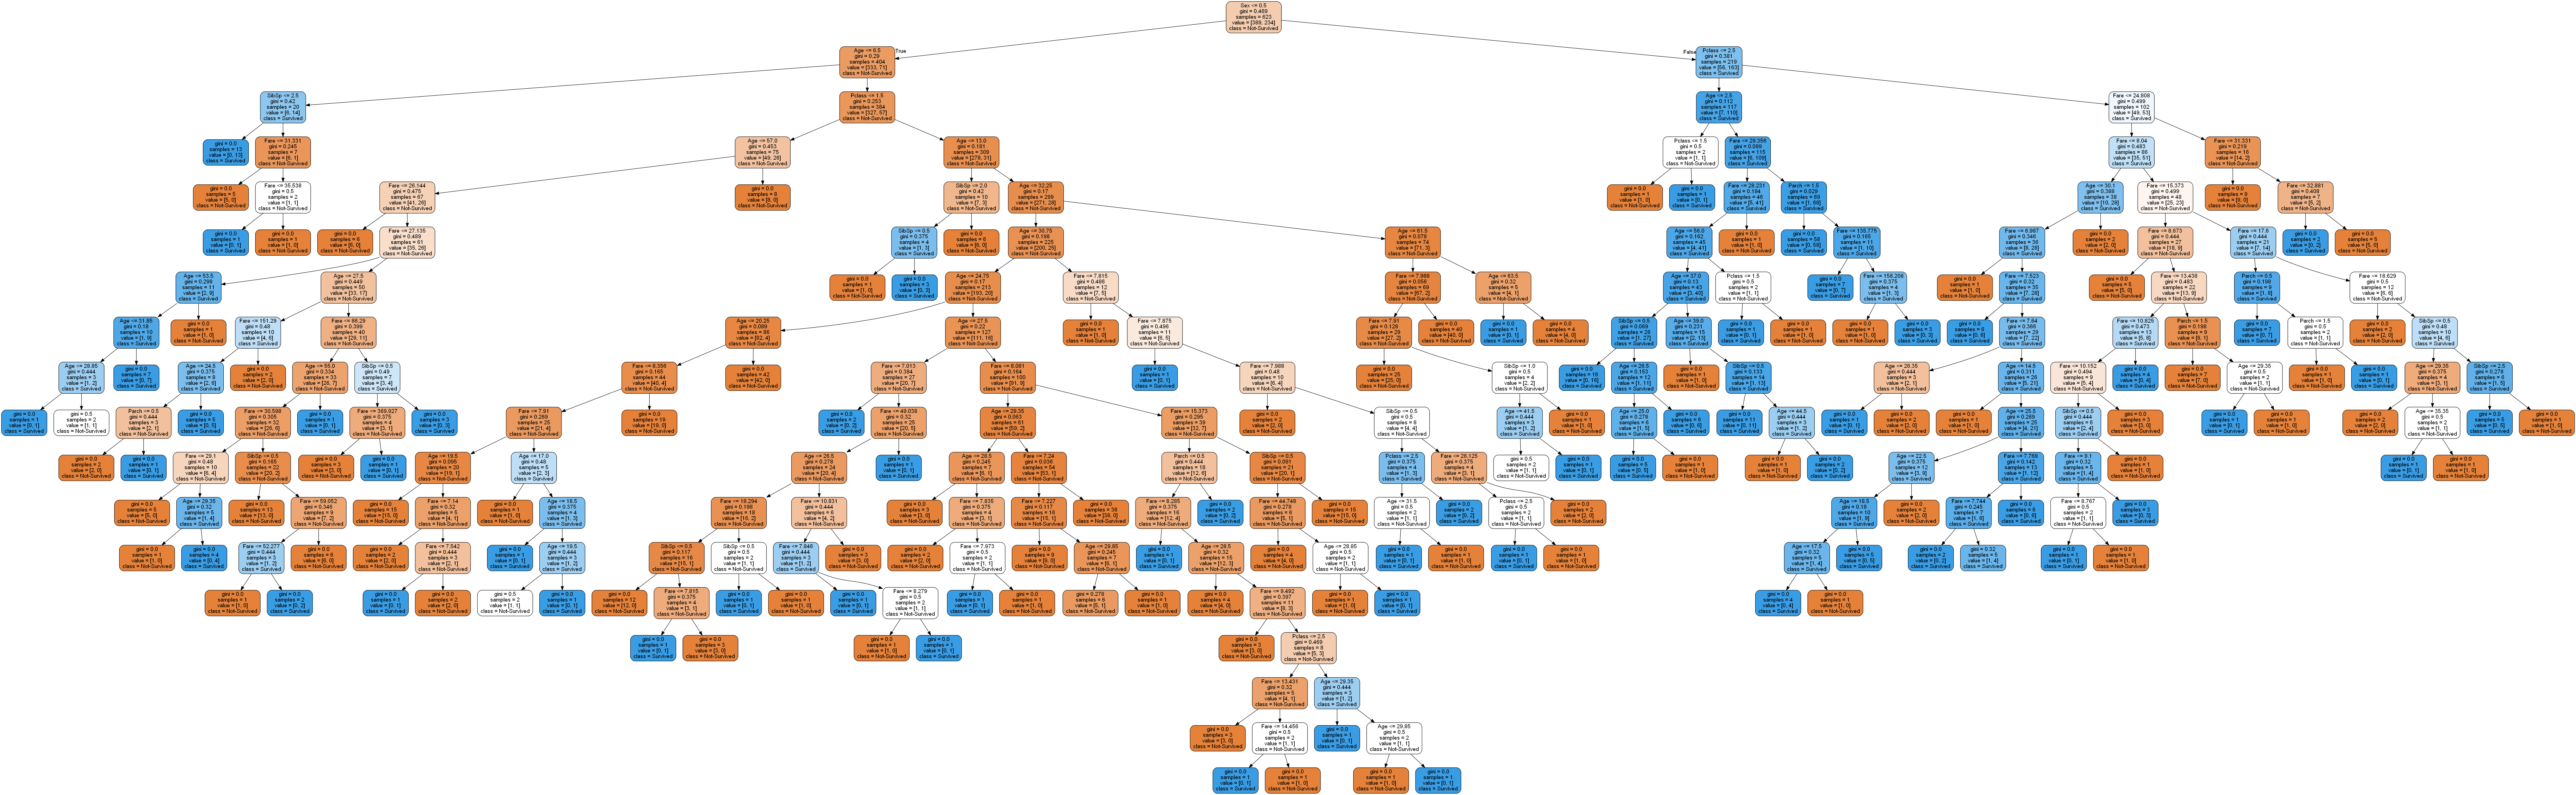

In [33]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(Tree_Model, out_file=None, filled=True, rounded=True, feature_names=indepnt_var,
                 class_names=target_class_var )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [34]:
# Predicting the probability for Training data
y_pred_prob_train = Tree_Model.predict_proba(X_train)
y_pred_prob_train[0:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [35]:
# Predicting the Accuracy score for Training data
y_pred_train_score = Tree_Model.predict(X_train)
y_pred_train_score[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

#### Fitting of Test data

In [37]:
# fitting the test data into decision tree model
Tree_Model.fit(X_test[indepnt_var], y_test[depnt_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

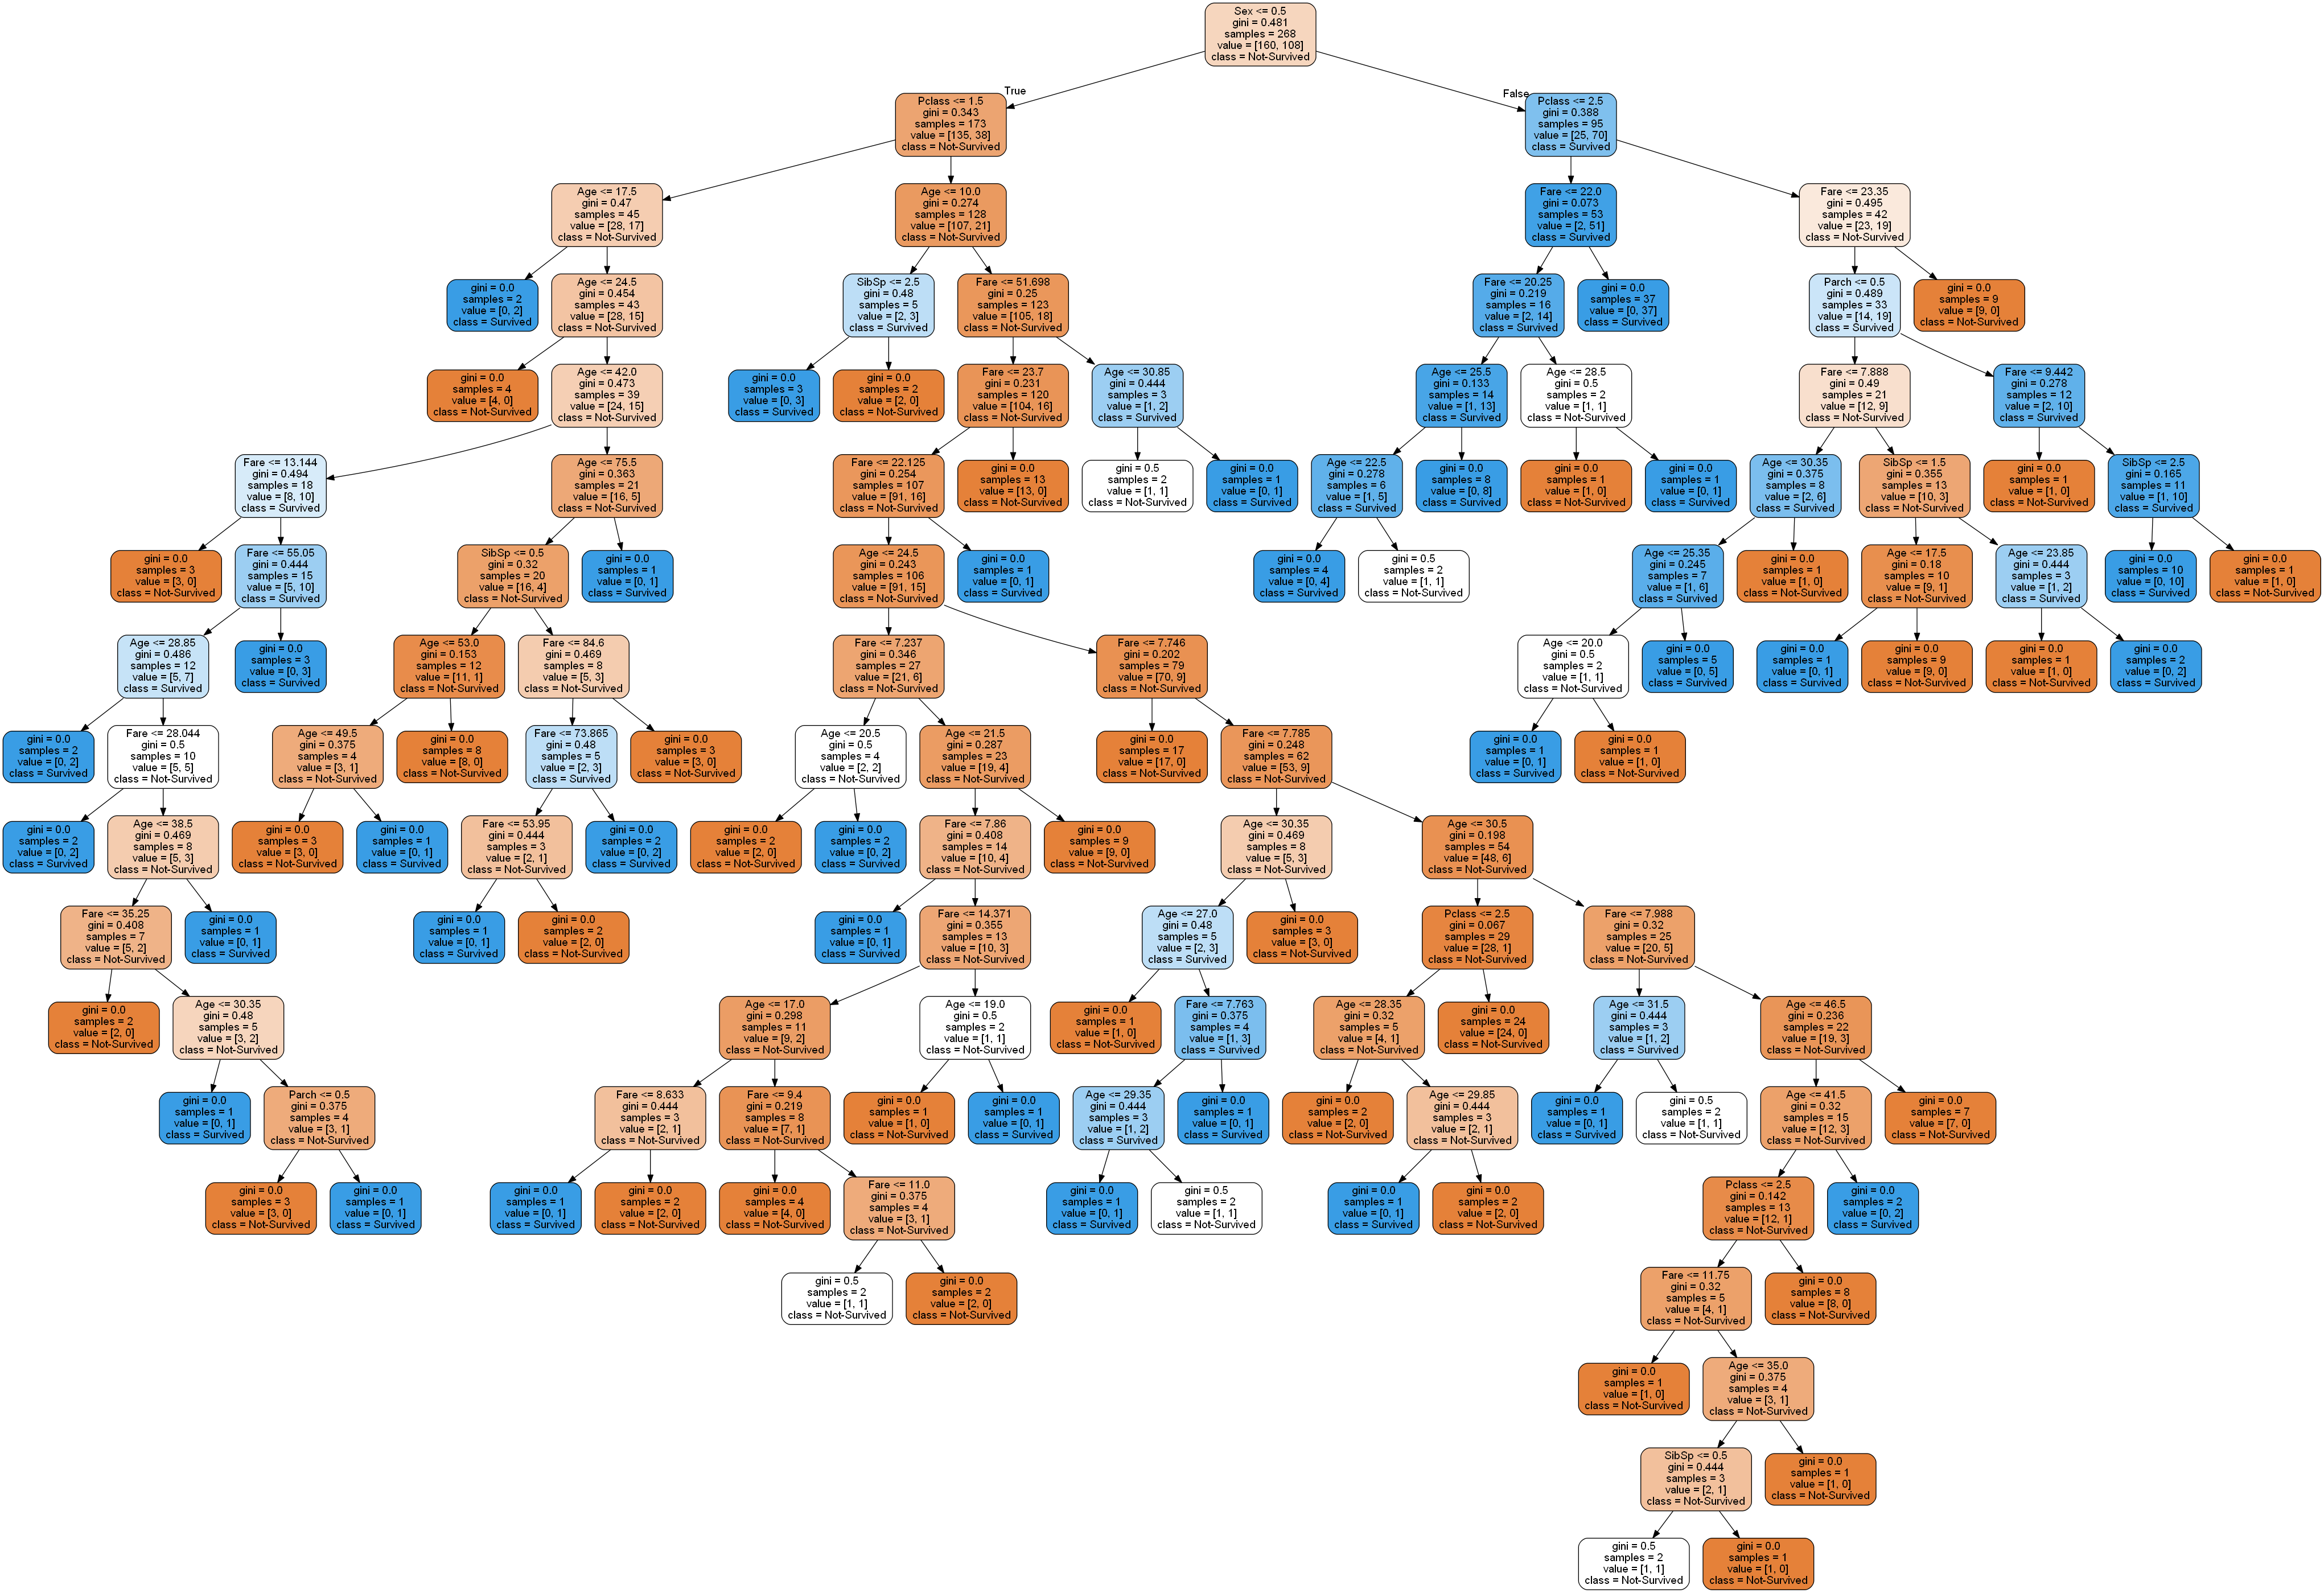

In [39]:
# Visualising decision tree for Test data
from sklearn.tree import export_graphviz
dot_data_test = export_graphviz(Tree_Model, out_file=None, filled=True,  rounded=True, feature_names=indepnt_var, class_names=target_class_var )
graph_test = pydotplus.graph_from_dot_data(dot_data_test) 
display(Image(graph_test.create_png()))

In [40]:
# Predicting the probability for Test data
y_pred_prob_test = Tree_Model.predict_proba(X_test)
y_pred_prob_test[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [41]:
# Predicting the Accuracy score for Test data
y_pred_test_score = Tree_Model.predict(X_test)
y_pred_test_score[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

### Evaluate the model's performance

#### Model evaluation for training data

In [42]:
# model performance ?
count_misclassified_train = (np.array(y_train.Survived) != y_pred_train_score).sum()
print('Misclassified samples in training data: {}'.format(count_misclassified_train))
accuracy_train_data = metrics.accuracy_score(np.array(y_train.Survived), y_pred_train_score)
print('Accuracy based upon training data: {:.4f}'.format(accuracy_train_data))

Misclassified samples in training data: 5
Accuracy based upon training data: 0.9920


In [43]:
from sklearn.metrics import classification_report, confusion_matrix  
print("The Confusion matrix based upon Training data \n", confusion_matrix(np.array(y_train.Survived), y_pred_train_score), "\n")  
print("The Classification report based upon Training data \n",classification_report(np.array(y_train.Survived), y_pred_train_score))

The Confusion matrix based upon Training data 
 [[388   1]
 [  4 230]] 

The Classification report based upon Training data 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       389
           1       1.00      0.98      0.99       234

   micro avg       0.99      0.99      0.99       623
   macro avg       0.99      0.99      0.99       623
weighted avg       0.99      0.99      0.99       623



From the confusion matrix, we can see that out of 623 training instances, our algorithm misclassified only 5 instances. This is 99.2 % accuracy.

#### Model evaluation for test data

In [44]:
# model performance ?
count_misclassified_test = (np.array(y_test.Survived) != y_pred_test_score).sum()
print('Misclassified samples in Test data: {}'.format(count_misclassified_test))
accuracy_test_data = metrics.accuracy_score(np.array(y_test.Survived), y_pred_test_score)
print('Accuracy based upon test data: {:.4f}'.format(accuracy_test_data))

Misclassified samples in Test data: 6
Accuracy based upon test data: 0.9776


In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print("The Confusion matrix based upon Training data \n", confusion_matrix(np.array(y_test.Survived), y_pred_test_score), "\n")  
print("The Classification report based upon Training data \n",classification_report(np.array(y_test.Survived), y_pred_test_score))

The Confusion matrix based upon Training data 
 [[160   0]
 [  6 102]] 

The Classification report based upon Training data 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       160
           1       1.00      0.94      0.97       108

   micro avg       0.98      0.98      0.98       268
   macro avg       0.98      0.97      0.98       268
weighted avg       0.98      0.98      0.98       268



From the confusion matrix, you can see that out of 268 test instances, our algorithm misclassified only 6. This is 97.76 % accuracy.

### Model Validation (Cross Validation)

#### Cross val Score

In [46]:
from sklearn.model_selection import cross_val_score

In [48]:
scores = cross_val_score(estimator= Tree_Model, X= features[indepnt_var], y = target[depnt_var], scoring = "accuracy", cv=10)
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.74444444 0.72222222 0.69662921 0.76404494 0.83146067 0.76404494
 0.82022472 0.7752809  0.82022472 0.82954545]
Average accuracy:  0.7768122233571673


As we can see that , Our model is able to predict 77.68% accurate results. Which is more than 61.6% ( percentage of not-survived passengers based upon statistical observation).